<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/Class-Activities/PlaAndPocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive/


Text(0.5, 1.0, 'Data Samples')

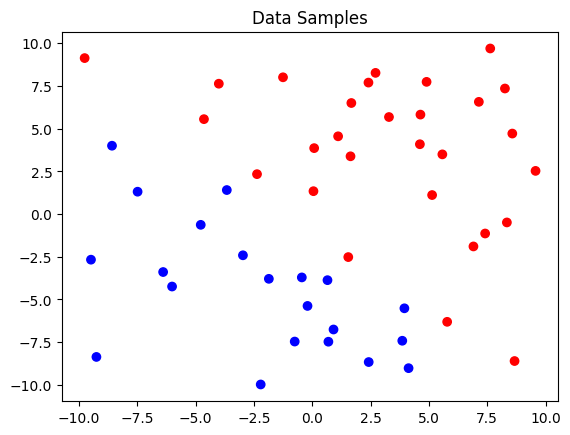

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')


synt= pd.read_csv('/content/drive/MyDrive/data/synthetic_dataset.csv')

#Looking at the data points in a scatter plot
x1 = synt['x1']
x2 = synt['x2']
y = synt['y']
colors = ['red' if label == 1 else 'blue' for label in y]

fig = plt.scatter(x1, x2, c=colors)
plt.title("Data Samples")

In [2]:
synt['x0'] = 1
X = synt[['x0', 'x1', 'x2']].values
y = synt['y'].values
observations, features = X.shape

def perceptron_algo(X, y, max_iterations=observations):

    weights = np.zeros(X.shape[1])
    for i in range(max_iterations):
        misclassified = 0
        for j in range(observations):
            if y[j] * np.dot(X[j], weights) <= 0:
                weights += y[j] * X[j]
                misclassified += 1
        if misclassified == 0:
            break

        print(f"iteration:{i+1} , weights{weights}, Number of misclassified: {misclassified}")

    return weights, misclassified

pla_weights,misclassified = perceptron_algo(X, y)

def validate(weights, X, y):
    predict = np.sign(np.dot(X, weights))
    accuracy = np.mean(predict == y)
    return accuracy
accuracy=validate(pla_weights,X,y)



print(f"Best Weights: {pla_weights}, Number of misclassified: {misclassified}")
print(f"Accuracy: {accuracy*100} %")

iteration:1 , weights[ 6.          8.15289571 18.17710968], Number of misclassified: 10
iteration:2 , weights[ 9.          5.72231963 18.48106118], Number of misclassified: 3
iteration:3 , weights[12.         15.25753228 15.61941417], Number of misclassified: 5
iteration:4 , weights[14.          7.04547206 22.23435375], Number of misclassified: 2
iteration:5 , weights[15.          7.41653362 24.84712185], Number of misclassified: 3
iteration:6 , weights[15.         17.54321156 18.32532456], Number of misclassified: 2
iteration:7 , weights[17.          9.33115134 24.94026414], Number of misclassified: 2
iteration:8 , weights[18.          9.7022129  27.55303224], Number of misclassified: 3
iteration:9 , weights[20.         15.85475859 23.85481227], Number of misclassified: 4
iteration:10 , weights[23.         13.42418251 24.15876377], Number of misclassified: 3
iteration:11 , weights[26.         10.99360643 24.46271527], Number of misclassified: 3
iteration:12 , weights[27.         11.36

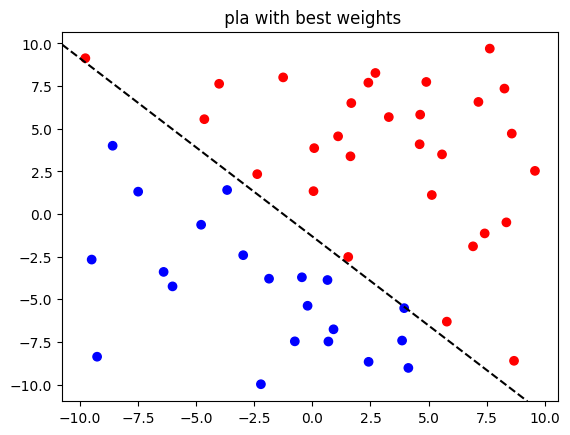

In [3]:
def plot(weights,title):
  x1 = synt['x1']
  x2 = synt['x2']
  y = synt['y']
  colors = ['red' if label == 1 else 'blue' for label in y]
  plt.scatter(x1, x2, c=colors)
  # Plot the decision boundary as a line
  x1_min, x1_max = x1.min() - 1, x1.max() + 1
  x2_min, x2_max = x2.min() - 1, x2.max() + 1
  xx, yy = np.meshgrid(np.arange(x1_min, x1_max,0.01), np.arange(x2_min, x2_max, 0.01))
  Z = np.dot(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()], weights)
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='dashed')
  plt.title(title)

  plt.show()
plot(pla_weights," pla with best weights")

In [4]:
def find_the_magnitude(x1,x2,m):
  m=list(m)
  magnitude=m[0]+x1*m[1]+x2*m[2]
  if magnitude>0:
    return 1
  else:
    return -1

In [5]:
#intializing the weight vector
weight_vector=[1,1,1]

synt['magnitude']=synt.apply(lambda x: find_the_magnitude(x['x1'],x['x2'],weight_vector),axis=1)
df_misclassified=synt[synt['y']!=synt['magnitude']]
print(len(df_misclassified))

0


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hyperplane(synt, weights, Algo):
    slope = -weights[1] / weights[2]
    intercept = -weights[0] / weights[2]
    x_hyperplane = np.linspace(synt['x1'].min(), synt['x1'].max(), 10)
    y_hyperplane = slope * x_hyperplane + intercept

    plt.figure(figsize=(8, 6))

    # Plot points with different colors based on class labels
    plt.scatter(synt['x1'][synt['y'] == 1], synt['x2'][synt['y'] == 1], color='blue')
    plt.scatter(synt['x1'][synt['y'] == -1], synt['x2'][synt['y'] == -1], color='red')

    # Plot the decision boundary line in black
    plt.plot(x_hyperplane, y_hyperplane, color='black', linewidth=2)

    plt.title(f"{Algo} Output")
    plt.xlabel("Feature x1")
    plt.ylabel("Feature x2")
    plt.legend(loc='upper right')  # Add legend for class labels
    plt.show()

# Example usage:
# Replace these with your actual data and weights
# plot_hyperplane(synt, weights, Algo)


In [7]:
def pocket(synt,weight_lis,max_iterations=1000):
  min_misclassification = 1000
  #intializing the weight vector
  weight_vector=np.array(weight_lis)

  synt['magnitude']=synt.apply(lambda x: find_the_magnitude(x['x1'],x['x2'],weight_vector),axis=1)
  synt_misclassified=synt[synt['y']!=synt['magnitude']]
  print(len(synt_misclassified))
  learning_rate = 0.01
  iteration = 1

  while len(synt_misclassified)!=0 and iteration<max_iterations:

    for index,row in synt_misclassified.iterrows():
      X_vector = np.array([1,row['x1'],row['x2']])
      weight_vector_temp=weight_vector+learning_rate*(X_vector)*row['y']
      synt['magnitude']=synt.apply(lambda x: find_the_magnitude(x['x1'],x['x2'],weight_vector_temp),axis=1)
      synt_misclassified_temp=synt[synt['y']!=synt['magnitude']]
      if len(synt_misclassified_temp)<min_misclassification:
        min_misclassification = len(synt_misclassified_temp)
        weight_vector=weight_vector_temp
    synt['magnitude']=synt.apply(lambda x: find_the_magnitude(x['x1'],x['x2'],weight_vector),axis=1)
    synt_misclassified=synt[synt['y']!=synt['magnitude']]
    #print('missclassified points are {} for iteration {} with weights {}'.format(min_misclassification,iteration,list(weight_vector)) )
    iteration+=1
  if min_misclassification==0:
    print('Pocket Converges after {} iterations'.format(iteration))
  else:
    print('Pocket not converging after {} iterations'.format(iteration))
  return weight_vector

In [8]:
weight_vector_pocket= pocket(synt,[0,1,1],200)

4
Pocket not converging after 200 iterations


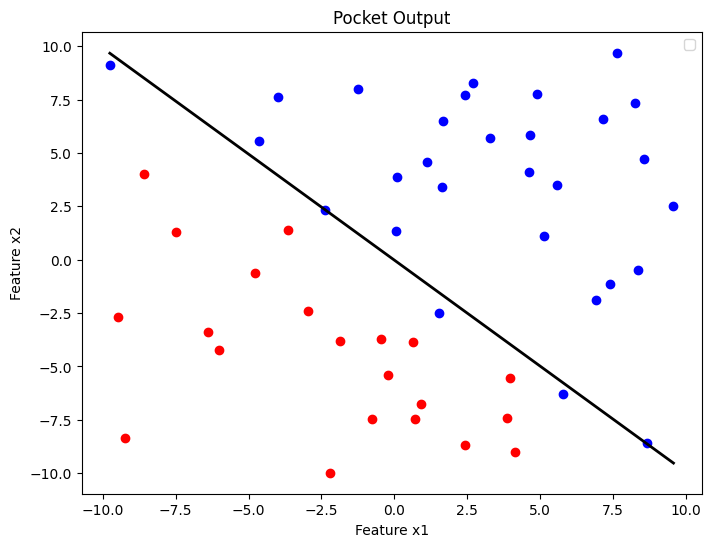

In [9]:
plot_hyperplane(synt,weight_vector_pocket,'Pocket')
